---

# Scikit-learn

[**Scikit-learn**](https://scikit-learn.org/stable/) is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. Key concepts and features include:


## Why Use Scikit-Learn For Machine Learning?

Whether you are just looking for an introduction to ML, want to get up and running fast, or are looking for the latest ML research tool, you will find that scikit-learn is both well-documented and easy to learn/use. As a high-level library, it lets you define a predictive data model in just a few lines of code, and then use that model to fit your data. It’s versatile and integrates well with other Python libraries, such as matplotlib for plotting, numpy for array vectorization, and pandas for dataframes.

Though scikit-learn has deep learning capabilities, one will typically use **tensorflow** or **pytorch** when working with deep learning models. However, most any other model that you work with will be best implemented with scikit-learn. 
 

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

sns.set_theme()

df = pd.read_csv("/Users/mingzeyuan/Desktop/Rice/22 Spring/INDE577/Final/Data/palmer_penguins.csv")
df = df.dropna()
df = df[df["species"] != "Adelie"]


X = df[["bill_length_mm","bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
    

y = df["species"].map(make_labels).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

clf = KNeighborsClassifier(n_neighbors = 7)

In [3]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [4]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True] 

sum(y_pred == y_test)/len(y_test) = 0.967741935483871


In [5]:
clf.score(X_test, y_test)

0.967741935483871

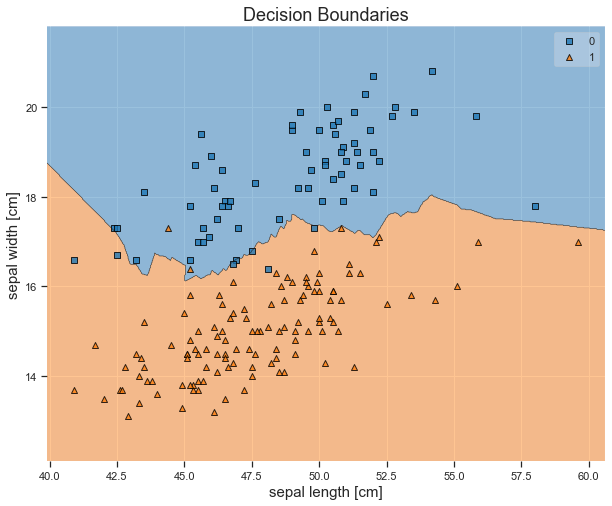

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

---

## The Confusion Matrix 
A **confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made. It is this breakdown that overcomes the limitation of using classification accuracy alone.


---

cf_matrix = [[19  2]
 [ 0 41]] 



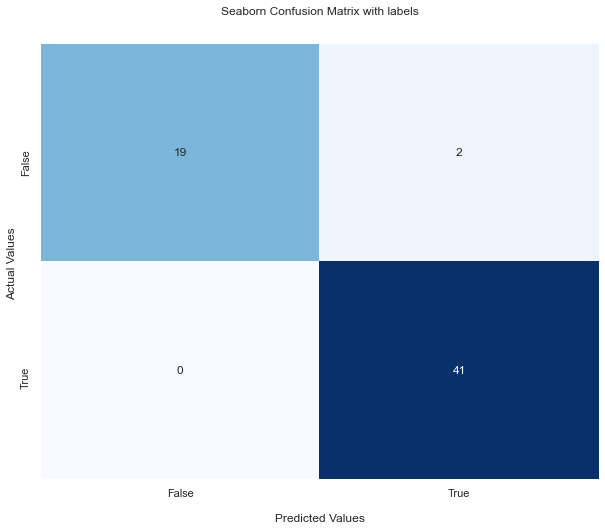

In [7]:
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors = 7)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

---

## Binary Classification Problems Are Special
In a binary classification problem, we are often looking to discriminate between observations with a specific outcome, from normal observations.

Such as a disease state or event from no disease state or no event.

In this way, we can assign the event row as “positive” (label 1) and the no-event row as “negative“ (label 0). We can then assign the event column of predictions as “true” and the no-event as “false“.

This gives us:

* “true positive” for correctly predicted event values.
* “false positive” for incorrectly predicted event values.
* “true negative” for correctly predicted no-event values.
* “false negative” for incorrectly predicted no-event values.

**Precision** ($P$) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives ($F_p$):
$$
P = \frac{T_p}{T_p + F_p}
$$

**Recall** ($R$) is defined as the number of true positives ($T_P$) over the number of true positives plus the number of false negatives ($F_n$):
$$
R = \frac{T_p}{T_p + F_n}
$$

There quantities are related to the **$F_1$-score**, which is defined as the harmonic mean of precision and recall:
$$
F_1 = 2 \frac{P\times R}{P+R}
$$

Note that the precision may not decrease with recall. The definition of precision shows that lowering the threshold of a classifier may increase the denominator, by increasing the number of results returned. If the threshold was previously set too high, the new results may all be true positives, which will increase precision. If the previous threshold was about right or too low, further lowering the threshold will introduce false positives, decreasing precision.

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.




---

In [8]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



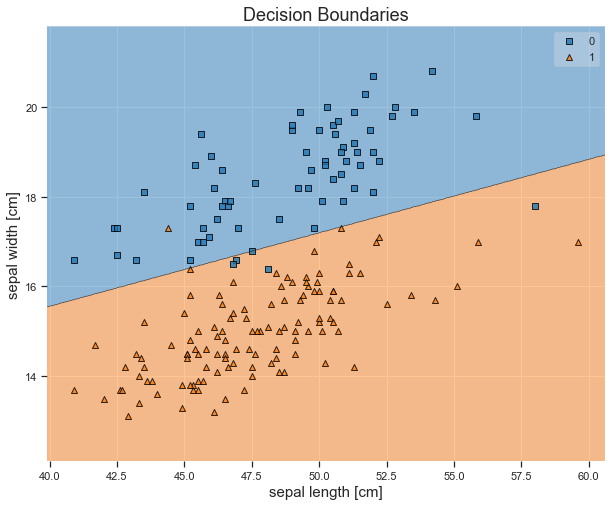

In [9]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf2)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[19  2]
 [ 0 41]] 



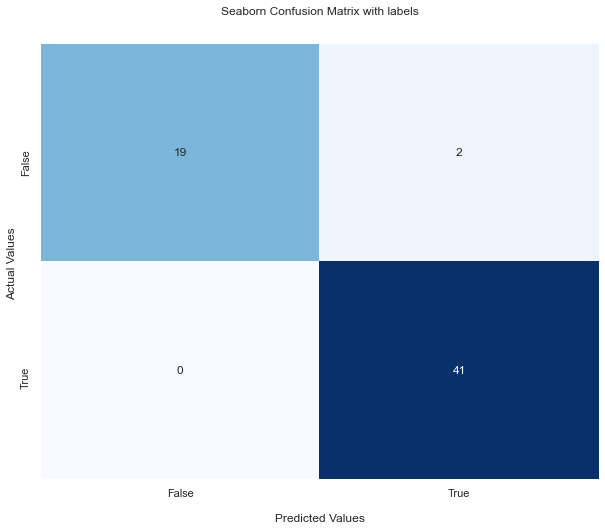

In [11]:

cf_matrix = confusion_matrix(y_test, log_y_pred)

print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [12]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.98        41

    accuracy                           0.97        62
   macro avg       0.98      0.95      0.96        62
weighted avg       0.97      0.97      0.97        62



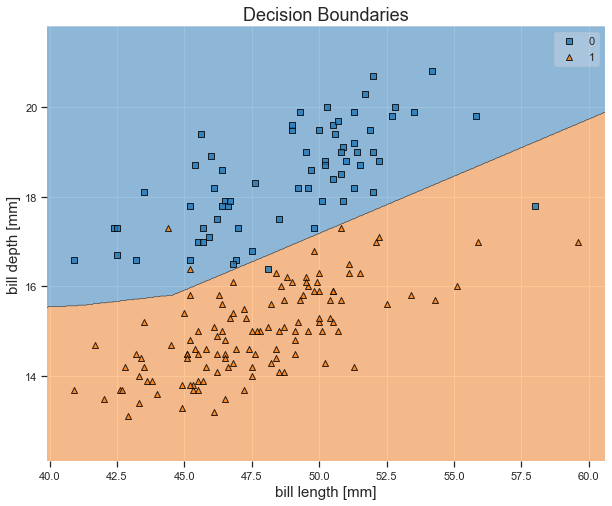

In [13]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf3)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()


cf_matrix = [[20  1]
 [ 0 41]] 



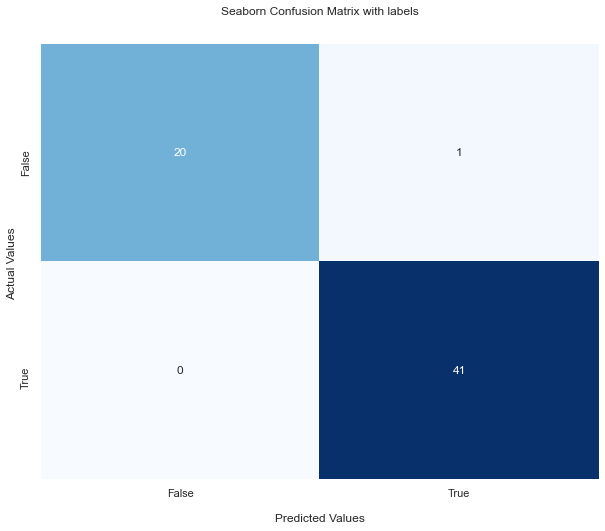

In [14]:
cf_matrix = confusion_matrix(y_test, net_y_pred)

print(f"cf_matrix = {cf_matrix} \n")

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [15]:
print(classification_report(y_test, net_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        41

    accuracy                           0.98        62
   macro avg       0.99      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62

